In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
# Boundary condition 
coefii = 1

del_0_v = -1/coefii
omega_0_v = 383.9911/coefii

In [3]:
# Differential equation parameters
ws = 376.9911

# ws = 0.376
# coefii = ws/4
K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii

# def F(u_double_prime,u_prime, u, x):       # DE, works with numpy arrays
#     # print(len(u_zegond))
#     # print(len(u_prime))
#     # print(len(u))
#     delta = u
#     delta_prime = u_prime
#     omega = delta_prime+ws
#     omega_prime = u_double_prime
#     return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
def F(u_double_prime,u_prime, u):       # DE, works with numpy arrays
    delta = u
    delta_prime = u_prime
    omega = delta_prime+ws
    omega_prime = u_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii

In [4]:



def f(t, w1, w2, w3, w4):
    return w1 * np.exp(-w2 * t) * np.cos(w3 * t)+w4

def f_prime(t, w1, w2, w3, w4):
    return w1 * (-w2*np.exp(-w2 * t)*np.cos(w3*t)-w3*np.exp(-w2 * t) * np.sin(w3 * t))

def f_double_prime(t, w1, w2, w3, w4):
    return w1 * w2**2 * np.exp(-w2 * t) * np.cos(w3 * t) + 2 * w1 * w2 * w3 * np.exp(-w2 * t) * np.sin(w3 * t) - w1 * w3**2 * np.exp(-w2 * t) * np.cos(w3 * t)

t = np.linspace(0,10, 10)
y_delta_real = 10*np.array([-0.1, -0.029341472379610736, 0.03740084123776386, 0.09497023731675054, 0.14070225462039962, 0.17478318133432622, 0.19900508897340943, 0.21554230622093148, 0.22633573288125447, 0.23288901326444864, 0.23627631206762756, 0.23722308799949673, 0.23616718775506054, 0.233369953043247, 0.2289083292339338, 0.22276724044905713, 0.21485487675329862, 0.2050075217253553, 0.19307549408317276, 0.17894966546312618, 0.16259182229817243, 0.14415592914145725, 0.12405867941822958, 0.10295665342359467, 0.08189990148581248, 0.06206167754493551, 0.04459447965992878, 0.030520094977792837, 0.02053639157317504, 0.014898866164466815, 0.013402767799888323, 0.015545289783300815, 0.02057761374223748, 0.02756113917141324, 0.03555787235137826, 0.04370243643452294, 0.05128071919413453, 0.057756844972179, 0.06277386603632164, 0.06618532847570928, 0.06800150728215103, 0.068329035180913, 0.06737085812649851, 0.06541358679554655, 0.06275424628261474, 0.05970698911008937, 0.0565628341616612, 0.053579291501234264, 0.050964337246751534, 0.04887937721626351, 0.04741254300260484, 0.04657642310697238, 0.04634134050802095, 0.04664052715604848, 0.047368849042567364, 0.048387165430041, 0.04957045939130505, 0.05079212580813866, 0.05194423078268951, 0.05294597110218043, 0.053744204464120385, 0.05430754183773785, 0.054622858431750416, 0.05470310637709986, 0.054585627107897244, 0.05431038763271371, 0.053921612626125236, 0.05346518554448, 0.052987016632903804, 0.052533042925300075, 0.052143563689530964, 0.0518318685337297, 0.05161324786000681, 0.05149271472345213, 0.05146286750705011, 0.05150715353544403, 0.051612218081373944, 0.05176188826377197, 0.05193882990895543, 0.05212477086480585, 0.05230050100076894, 0.05244967385010181, 0.05257017521366648, 0.05265454708090231, 0.05269939920287696, 0.05270671969505493, 0.05268387503729751, 0.05264117486353703, 0.05258262920396562, 0.05251496146444116, 0.05244474501425361, 0.05237791829239997, 0.052319784807584216, 0.05227501313821735, 0.05224551459190939, 0.05222940256108651, 0.052226618155243695, 0.052235845786241186, 0.05225442663291534, 0.05227835864107858])
y_omega_real = 10*np.array([38.39911, 38.3890342397665, 38.32151287957913, 38.212193246972774, 38.09205300010923, 37.98410927917925, 37.897346347232876, 37.83153600509199, 37.782873095792326, 37.746864508756815, 37.71961484495394, 37.69802198783197, 37.6797876293322, 37.66311524129595, 37.646752362695885, 37.629746197985774, 37.611450869713835, 37.59157486340406, 37.570249177970936, 37.548084782364526, 37.52646995467841, 37.507520317393045, 37.493955869440185, 37.48869863819847, 37.494467813737366, 37.51243968004359, 37.541645007225185, 37.57934974123821, 37.621640930715415, 37.66432298978025, 37.70349692332397, 37.736077330915045, 37.76004653355408, 37.77472356459465, 37.78035557162696, 37.77799073461047, 37.76935380264216, 37.75638408659305, 37.74100085016469, 37.72487921245072, 37.709375298785744, 37.69558853036932, 37.68427019464093, 37.67580017960898, 37.67036005527707, 37.667963194604276, 37.668376925381025, 37.67113189926946, 37.67567949180971, 37.68140792473483, 37.68769104645033, 37.69393331580064, 37.69963525470821, 37.7043763399175, 37.70790988812483, 37.71016722760148, 37.711179190449954, 37.71103856846317, 37.70992306315938, 37.70809335768852, 37.70585534412983, 37.703430390228824, 37.7010493536663, 37.69889459103102, 37.697088851899416, 37.69569593719707, 37.69479290516316, 37.69440394949094, 37.694490013932594, 37.69494879229926, 37.695639282776696, 37.6964974506016, 37.69743038030112, 37.69835139534924, 37.69918818656902, 37.6998924939533, 37.700436939831235, 37.70078580650919, 37.700929352080585, 37.700885227876114, 37.70069847846378, 37.70042849510888, 37.700094831796974, 37.69973391267282, 37.699379690483504, 37.69905985602646, 37.698795838149486, 37.698598272536486, 37.69846465333067, 37.69840320168954, 37.69841447707153, 37.69848990887833, 37.69861179645488, 37.69875330908937, 37.69889225482838, 37.699027983792725, 37.69914855307438, 37.699245657254515, 37.69931511795725, 37.69935688384964]) 

# t = np.linspace(0, 1, 50)
# y_delta_real = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
# y_omega_real = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]

# def loss(params):

#     w1, w2, w3, w4 = params
#     fitted_values = f(t, w1, w2, w3, w4)
#     return np.sum((fitted_values - target_values) ** 2)

def loss(params):

    w1, w2, w3, w4 = params

    u = f(t,w1,w2,w3,w4)
    u_prime = f_prime(t,w1,w2,w3,w4)
    u_double_prime = f_double_prime(t,w1,w2,w3,w4)

    loss_i = np.sum((F(u_double_prime,u_prime, u))**2)/len(t)


    delta_0 = f(0,w1,w2,w3,w4)
    omega_0 = f_prime(0,w1,w2,w3,w4)+ws
    loss_b = (delta_0-del_0_v)**2 + (omega_0 - omega_0_v)**2

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+1000*loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss



initial_params = [1.0, 0.1, 1.0, 0.1]


result = minimize(loss, initial_params, method='Nelder-Mead')
print(result.fun)

opt_w1, opt_w2, opt_w3, opt_w4 = result.x


print("Optimized w1:", opt_w1)
print("Optimized w2:", opt_w2)
print("Optimized w3:", opt_w3)
print("Optimized w4:", opt_w4)

1.8471940747164897
Optimized w1: -3.5517190431948156
Optimized w2: 1.9709128831697897
Optimized w3: -1.979269203608332
Optimized w4: 2.5527118014044916


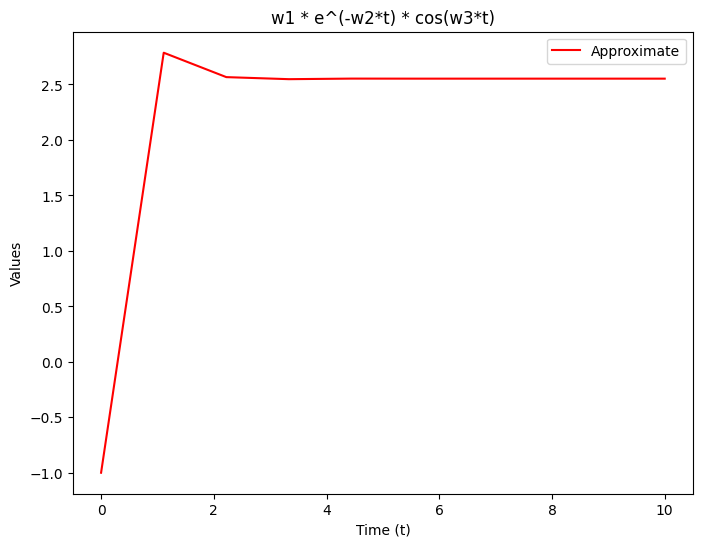

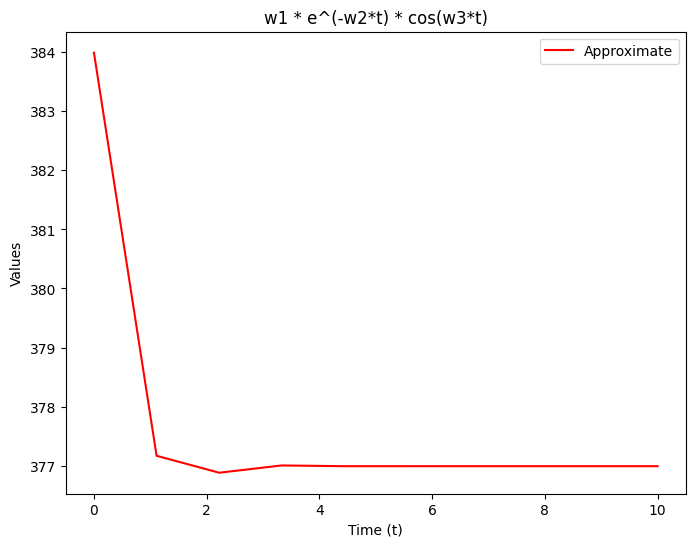

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
# plt.scatter(t, y_delta_real, label='Target Values', alpha=0.5)
approximate_delta = f(t, opt_w1, opt_w2, opt_w3, opt_w4)
plt.plot(t, approximate_delta, 'r', label='Approximate')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('w1 * e^(-w2*t) * cos(w3*t)')




plt.figure(figsize=(8, 6))
# plt.scatter(t, y_omega_real, label='Target Values', alpha=0.5)
approximate_omega = f_prime(t, opt_w1, opt_w2, opt_w3, opt_w4)+ws
plt.plot(t, approximate_omega, 'r', label='Approximate')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('w1 * e^(-w2*t) * cos(w3*t)')

plt.show()
